In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
import numpy as np

In [13]:
# DATA

## BioSyn
### Evaluated on dev
bs_habitat_eval_bs_on_dev = [73.2594936709,71.3607594937,71.2025316456,71.6772151899,69.3037974684,71.3607594937,71.2025316500,71.0443037975,70.2531645570,73.4177215190]
bs_habitat_eval_bb4_on_dev = [63.9800,62.8200,62.5400,63.2100,62.1700,62.4900,62.6100,61.7400,61.7400,63.9200]

bs_phenotype_eval_bs_on_dev = [60.2484472050,61.4906832298,62.7329192547,62.1118012422,62.1118012422,61.4906832298,62.1118012422,62.7329192547,60.8695652174,63.9751552795]
bs_phenotype_eval_bb4_on_dev = [54.04,55.28,56.52,55.90,55.90,55.28,55.90,56.52,54.66,57.76]

### Evaluated on test
bs_ncbi_eval_bs_on_test = [90.20833333,89.89583333,91.35416667,90.10416667,90.52083333,91.14583333,90.10416667,90.41666667,90.52083333,90.41666667]
bs_habitat_eval_bb4_on_test = [61.39,60.86,61.69,63.06,62.42,62.31,62.92,60.62,63.31,61.83]
bs_phenotype_eval_bb4_on_test = [72.35,73.15,73.54,73.94,70.50,70.90,77.25,75.53,72.75,75.93]

#Lightweight
### Evaluated on test
lw_ncbi_authors_eval_lw_on_test = [88.345,88.450,88.033,89.906,88.762,89.906,89.386,89.906,89.282,86.889]
lw_ncbi_reprod_eval_lw_on_test = [76.691,75.650,76.899,77.107,76.379,78.044,74.922,75.963,75.858,75.546]

lw_habitat_eval_bb4_on_test = [46.18,46.13,46.50,45.66,46.38,47.03,46.10,45.69,46.94,46.34]
lw_phenotype_eval_bb4_on_test = [60.05,61.64,60.85,64.02,62.04,62.04,59.66,66.80,61.64,61.24]

55.775999999999996

90.46875
88.88650000000001


(array([1, 2, 3]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

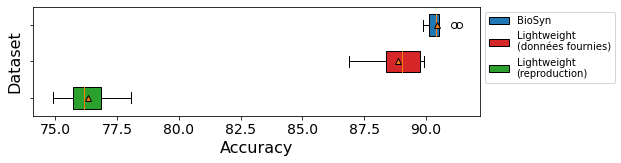

In [5]:
# Reproduction on NCBI Disease
import numpy as np
data = [lw_ncbi_reprod_eval_lw_on_test, lw_ncbi_authors_eval_lw_on_test, bs_ncbi_eval_bs_on_test]
plt.figure(figsize = (8,2))
boxplots = plt.boxplot(data, notch = False, labels = ['', '', ''], widths = .6, showmeans = True, meanprops={'markerfacecolor': colors[1], 'markeredgecolor': 'black'}, vert = False, patch_artist=True)
boxplots['boxes'][0].set_facecolor(colors[2])
boxplots['boxes'][1].set_facecolor(colors[3])
boxplots['boxes'][2].set_facecolor(colors[0])
print(np.mean(bs_ncbi_eval_bs_on_test))
print(np.mean(lw_ncbi_authors_eval_lw_on_test))
plt.legend(handles = [boxplots["boxes"][2], boxplots["boxes"][1], boxplots['boxes'][0]], labels = ['BioSyn', 'Lightweight\n(données fournies)',  'Lightweight\n(reproduction)'], bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel('Accuracy', fontsize = 16)
plt.ylabel('Dataset', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(45.0, 80.0)

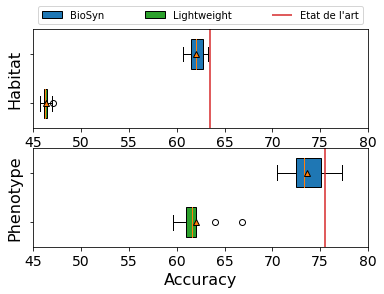

In [9]:
# Adaptation to BB4
habitat = [lw_habitat_eval_bb4_on_test, bs_habitat_eval_bb4_on_test]
phenotype = [lw_phenotype_eval_bb4_on_test, bs_phenotype_eval_bb4_on_test]


plt.subplot(2,1,1)
boxplots_habitat = plt.boxplot(habitat, notch = False, labels = ['', ''], widths = .6, showmeans = True, meanprops={'markerfacecolor': colors[1], 'markeredgecolor': 'black'}, vert= False, patch_artist=True)
boxplots_habitat['boxes'][0].set_facecolor(colors[2])
boxplots_habitat['boxes'][1].set_facecolor(colors[0])
eda = plt.vlines(x=63.5, ymin=0.5, ymax=2.5, colors=colors[3])

plt.legend([boxplots_habitat["boxes"][1], boxplots_habitat["boxes"][0], eda], ['BioSyn', 'Lightweight', "Etat de l'art"], bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3)
plt.ylabel('Habitat', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(45,80)


plt.subplot(2,1,2)
boxplots_habitat = plt.boxplot(phenotype, notch = False, labels = ['', ''], widths = .6, showmeans = True, meanprops={'markerfacecolor': colors[1], 'markeredgecolor': 'black'}, vert= False, patch_artist=True)
boxplots_habitat['boxes'][0].set_facecolor(colors[2])
boxplots_habitat['boxes'][1].set_facecolor(colors[0])
plt.vlines(x=75.5, ymin=0.5, ymax=2.5, colors=colors[3])

plt.xlabel('Accuracy', fontsize = 16)
plt.ylabel('Phenotype', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(45,80)


(52.0, 75.0)

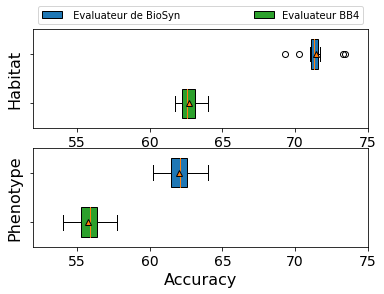

In [12]:
# Comparaison Evaluateurs
eval_habitat = [bs_habitat_eval_bb4_on_dev, bs_habitat_eval_bs_on_dev]
eval_phenotype = [bs_phenotype_eval_bb4_on_dev, bs_phenotype_eval_bs_on_dev]

plt.subplot(2,1,1)
boxplots_eval_habitat = plt.boxplot(eval_habitat, notch = False, labels = ['', ''], widths = .6, showmeans = True, meanprops={'markerfacecolor': colors[1], 'markeredgecolor': 'black'}, vert= False, patch_artist=True)
boxplots_eval_habitat['boxes'][0].set_facecolor(colors[2])
boxplots_eval_habitat['boxes'][1].set_facecolor(colors[0])
plt.legend([boxplots_eval_habitat["boxes"][1], boxplots_eval_habitat["boxes"][0]], [' Evaluateur de BioSyn', 'Evaluateur BB4'], bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2)
plt.ylabel('Habitat', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(52,75)

plt.subplot(2,1,2)
boxplots_eval_phenotype = plt.boxplot(eval_phenotype, notch = False, labels = ['', ''], widths = .6, showmeans = True, meanprops={'markerfacecolor': colors[1], 'markeredgecolor': 'black'}, vert= False, patch_artist=True)
boxplots_eval_phenotype['boxes'][0].set_facecolor(colors[2])
boxplots_eval_phenotype['boxes'][1].set_facecolor(colors[0])
plt.xlabel('Accuracy', fontsize = 16)
plt.ylabel('Phenotype', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(52,75)